In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graycode
import cmath

In [78]:
def f(x,y):
    return 2*np.cos(4*np.pi*x)*np.cos(6*np.pi*y)+np.sin(2*np.pi*x)*np.sin(4*np.pi*y)

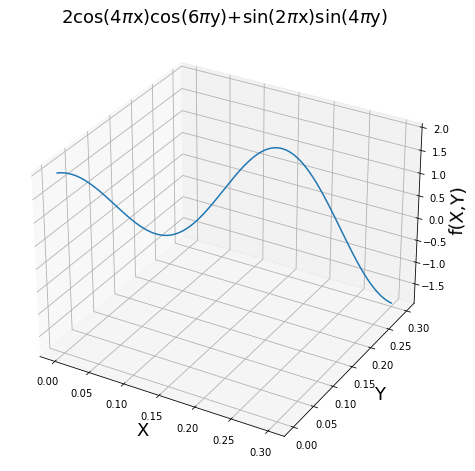

In [79]:
plt.figure(figsize=(8, 8))

x=np.linspace(0,.3,2**10)
y=np.linspace(0,.3,2**10)

ax = plt.axes(projection ='3d')
ax.plot3D(x,y,f(x,y))

ax.set_xlabel("X", fontsize=18)

ax.set_ylabel("Y", fontsize=18)

ax.set_zlabel("f(X,Y)", fontsize=18)

ax.set_title("2cos(4$\pi$x)cos(6$\pi$y)+sin(2$\pi$x)sin(4$\pi$y)", fontsize=18)

plt.show()

<Figure size 576x576 with 0 Axes>

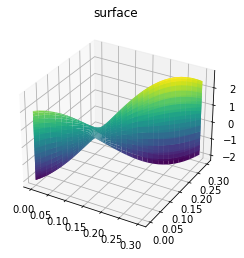

In [49]:
plt.figure(figsize=(8, 8))

x=np.linspace(0,.3,2**5)
y=np.linspace(0,.3,2**5)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z,100)
ax.plot_surface(x, y, f(X,Y), rstride=1, cstride=1,cmap='viridis', edgecolor='none')
#ax.plot3D(x,y,f(x,y))
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('f(x,y)')
#plt.show()
ax.set_title('surface');

In [50]:
np.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [80]:
m = 2  # No. of qubits to which uniformly controlled rotations are applied. 
M = 2**m # No. of cos and sin terms in the Fourier series. 

aij_tilde=np.zeros(((M)**2))
aij_tilde=aij_tilde.reshape(M,M)

bij_tilde=np.zeros(((M)**2))
bij_tilde=bij_tilde.reshape(M,M)

for i in range(M):
    for j in range(M):
        if i==2 and j==3:
            aij_tilde[i,j]=2

for i in range(M):
    for j in range(M):
        if i==1 and j==2:
            bij_tilde[i,j]=1

Fxy=0 
                     
for k in range(M):
    for j in range(M):
        Fxy+= aij_tilde[k,j]*np.cos(2*np.pi*k*x)*np.cos(2*np.pi*j*y) + bij_tilde[k,j]*np.sin(2*np.pi*k*x)*np.sin(2*np.pi*j*y)


In [81]:
Fxy

tensor([ 2.        ,  1.99996265,  1.99985062, ..., -1.85933015,
        -1.86373144, -1.86803399], requires_grad=True)

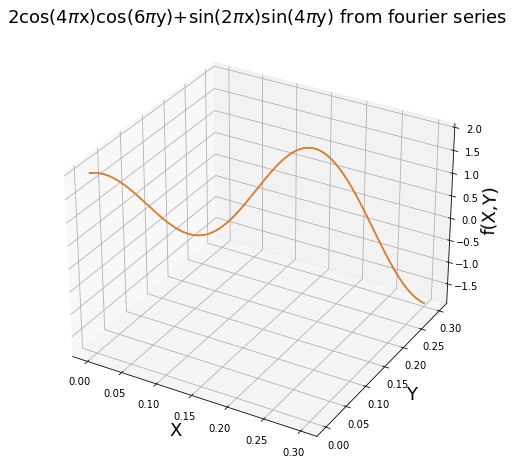

In [82]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')

ax.plot3D(x,y,Fxy)

ax.plot3D(x,y,f(x,y))

ax.set_xlabel("X", fontsize=18)

ax.set_ylabel("Y", fontsize=18)

ax.set_zlabel("f(X,Y)", fontsize=18)

ax.set_title("2cos(4$\pi$x)cos(6$\pi$y)+sin(2$\pi$x)sin(4$\pi$y) from fourier series", fontsize=18)

plt.show()

In [83]:
akj=np.zeros(((M)**2))
akj=akj.reshape(M,M)
ckj=np.zeros(((M)**2))
ckj=ckj.reshape(M,M)

for k in range(M):
    for j in range(M):
        if (k==0 and j==0) or (k==0 or j==0):
            akj[k,j]=aij_tilde[k,j]
        else:
            akj[k,j]=1/2*(aij_tilde[k,j]-bij_tilde[k,j])
        
for k in range(M):
    for j in range(M):
        ckj[k,j]=1/2*(aij_tilde[k,j]+bij_tilde[k,j])

In [84]:
F2xy=0 
                     
for k in range(M):
    for j in range(M):
        F2xy+= akj[k,j]*np.cos(2*np.pi*k*x+2*np.pi*j*y) + ckj[k,j]*np.cos(2*np.pi*k*x-2*np.pi*j*y)


In [85]:
F2xy

tensor([ 2.        ,  1.99996265,  1.99985062, ..., -1.85933015,
        -1.86373144, -1.86803399], requires_grad=True)

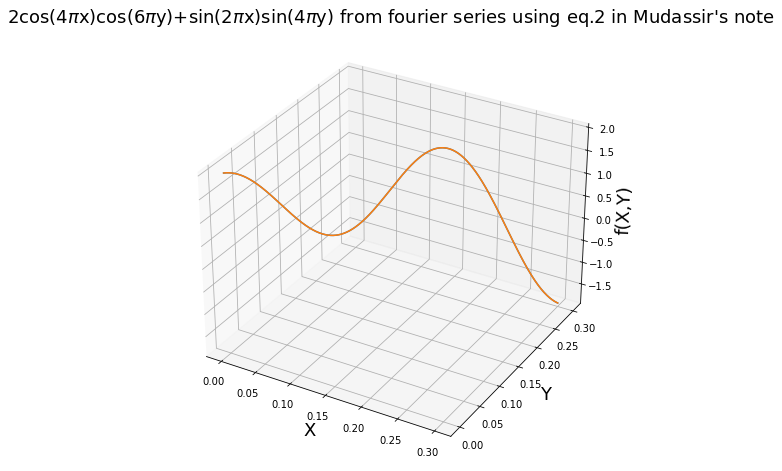

In [86]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')

ax.plot3D(x,y,F2xy)

ax.plot3D(x,y,f(x,y))

ax.set_xlabel("X", fontsize=18)

ax.set_ylabel("Y", fontsize=18)

ax.set_zlabel("f(X,Y)", fontsize=18)

ax.set_title("2cos(4$\pi$x)cos(6$\pi$y)+sin(2$\pi$x)sin(4$\pi$y) from fourier series using eq.2 in Mudassir's note", fontsize=18)

plt.show()

In [87]:
Akj=np.zeros(((M)**2))
Akj=Akj.reshape(M,M)
Bkj=np.zeros(((M)**2))
Bkj=Bkj.reshape(M,M)

for k in range(M):
    for j in range(M):
        Akj[k,j]=akj[k,j]

for k in range(1,M):
    for j in range(1,M):
        Bkj[k,j]=ckj[k,j]

In [88]:
F3xy=0 
                     
for k in range(M):
    for j in range(M):
        F3xy+= Akj[k,j]*np.exp(-1j*(2*np.pi*k*x+2*np.pi*j*y))+Bkj[k,j]*np.exp(-1j*(2*np.pi*k*x-2*np.pi*j*y))
        #cos(2*np.pi*k*x+2*np.pi*j*y) + Bkj[k,j]*np.cos(2*np.pi*k*x-2*np.pi*j*y)


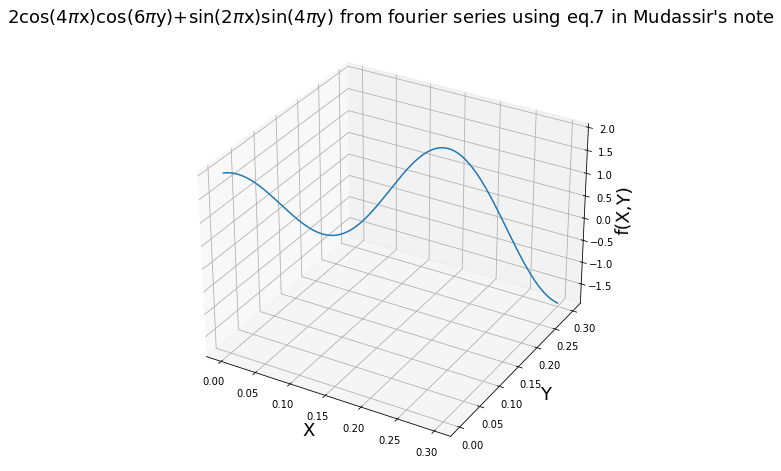

In [89]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')

ax.plot3D(x,y,np.real(F3xy))

#ax.plot3D(x,y,f(x,y))

ax.set_xlabel("X", fontsize=18)

ax.set_ylabel("Y", fontsize=18)

ax.set_zlabel("f(X,Y)", fontsize=18)

ax.set_title("2cos(4$\pi$x)cos(6$\pi$y)+sin(2$\pi$x)sin(4$\pi$y) from fourier series using eq.7 in Mudassir's note", fontsize=18)

plt.show()

In the below cell we are calculating $\theta_{AB}$ such that we can apply the rotation $Ry(2\theta_{AB})$

In [91]:
psi_A=0
psi_B=0

for k in range(M):
    for j in range(M):
        psi_A+=np.abs(Akj[k,j])**2
psi_A=np.sqrt(psi_A)

for k in range(M):
    for j in range(M):
        psi_B+=np.abs(Bkj[k,j])**2
psi_B=np.sqrt(psi_B)

In [92]:
theta_AB=np.arctan(np.abs(psi_B)/np.abs(psi_A))
theta_AB

tensor(0.78539816, requires_grad=True)

In [93]:
#calculating norm of the state

psi_F=0
psi_F=np.sqrt(np.abs(psi_A)**2+np.abs(psi_B)**2)
psi_F # normalization constant of the state

tensor(1.58113883, requires_grad=True)

In the below cell we are converting the 2D arrays $A_{kj},B_{kj}$ to 1D array $\psi_{A_P}$ and $\psi_{B_P}$ such that we can insert those parameters into the quantum
circuit.

In [95]:
psi_Ap=[]

for j in range(M):
    for k in range(M):
        psi_Ap.append(Akj[j,k])
        
psi_Bp=[]

for j in range(0,M):
    for k in range(0,M):
        psi_Bp.append(Bkj[j,k])

In [96]:
len(psi_Bp)

16

In [97]:
def find_alphas(target):
    
    n = int(np.log(len(target))/np.log(2))
    
    # We first calculate alpha^{y} using
    # Eq(8) of 0407010.
    alphas_y = []
    
    for j in range(n):
        alpha_j = []
        
        for mu in range(2**(n-j-1)):
            
            num = 0
            for l in range(2**j):
                num = num + np.abs(target[(2*mu+1)*(2**(j))+l])**2
            num = np.sqrt(num)
            
            den = 0
            for l in range(2**(j+1)):
                den = den + np.abs(target[(mu)*(2**(j+1))+l])**2
            den = np.sqrt(den)
            
            if (den<num):
                raise ValueError("something is not right. Argument of arcsin has to be less than 1.")
            elif den==num:
                ratio = 1
            else:
                ratio = num/den
            
            alpha_j.append(2*np.arcsin(ratio))
            
        alphas_y.append(alpha_j)
    
    # We now calculate the alpha^{z} using
    # Eq(5) of 0407010.
    alphas_z = []
    phases = [cmath.phase(t) for t in target]
    
    for j in range(n):
        alpha_j = []
        
        for mu in range(2**(n-j-1)):
            
            sum = 0
            for l in range(2**j):
                sum = sum + (phases[(2*mu+1)*(2**j)+l]-phases[(2*mu)*(2**j)+l])
            sum = sum/(2**j)
            
            alpha_j.append(sum)
        
        alphas_z.append(alpha_j)
    
    # We now calculate the global phase
    # as defined in Eq(7) of 0407010.
    
    global_phase = 2*np.mean(phases)
    
    return alphas_y, alphas_z, global_phase
    

def find_thetas(alphas):
    
    # We calculate thetas using
    # Eq(3) of 0407101.
    
    thetas = []
    
    for alpha in alphas:
        
        theta = []
        
        for i in range(len(alpha)):
            theta_i = 0
            
            for j in range(len(alpha)):
                theta_i = theta_i + M(i,j)*alpha[j]
            theta_i = theta_i/len(alpha)
            
            theta.append(theta_i)
        
        thetas.append(theta)
    
    return thetas

def M(i,j):
    
    # This calculates the matrix M
    # defined in Eq(3) of 0407101.
    # However, our definition is different by a factor of 2^{-k}. 
    
    bj = bin(j)[2:]
    bj_rev = bj[::-1]
    gi = bin(graycode.tc_to_gray_code(i))[2:]
    gi_rev = gi[::-1]
    
    mij = 0
    for x,y in zip(bj_rev,gi_rev):
        mij = mij + int(x)*int(y)
    
    return (-1)**mij

def cnot_position(r):
    
    g1 = bin(graycode.tc_to_gray_code(r))[2:]
    g2 = bin(graycode.tc_to_gray_code(r-1))[2:]
    
    if len(g2)<len(g1):
        g2 = '0' + g2
    
    g1_rev = g1[::-1]
    g2_rev = g2[::-1]
    
    for p in range(len(g1)):
        if g1_rev[p] != g2_rev[p]:
            return p+1


In [98]:
def UCRot(axes,wires,theta):   # Uniformly controlled rotation from 0404089 and 0407010
    
    # wires is the list of wires on which UCRot is acting.
    
    if axes == 'y':
        rot = qml.RY
    elif axes == 'z':
        rot = qml.RZ
    else:
        raise ValueError("only y or z axes are allowed.")
    
    if (len(theta)!=(2**(len(wires)-1))):
        raise ValueError("something is not right.")
        
    wires.reverse()
    
    for r in range(len(theta)-1):
        
        rot(-theta[r],wires=wires[0])   
        #We took -theta because RY or RZ definition
        #in the paper is different from that in pennylane
        qml.CNOT(wires=[wires[cnot_position(r+1)], wires[0]])
    
    
    r = len(theta)-1
    rot(-theta[r],wires=wires[0])
    if r>0:
        qml.CNOT(wires=[wires[-1],wires[0]])
        
def UCRot_inv(axes,wires,theta):
    
    # wires is the list of wires on which UCRot is acting.
    
    if axes == 'y':
        rot = qml.RY
    elif axes == 'z':
        rot = qml.RZ
    else:
        raise ValueError("only y or z axes are allowed.")
    
    if (len(theta)!=(2**(len(wires)-1))):
        raise ValueError("something is not right.")
        
    wires.reverse()
    
    r = len(theta)-1
    if r>0:
        qml.CNOT(wires=[wires[-1],wires[0]])
    rot(theta[r],wires=wires[0])
    
    rs = [(len(theta)-2-r) for r in range(len(theta)-1)]
    for r in rs:
        qml.CNOT(wires=[wires[cnot_position(r+1)], wires[0]])
        rot(theta[r],wires=wires[0])   

In [99]:
def QFT_inverse(wires):
    
    for q in range(int(len(wires)/2)):
        qml.SWAP(wires=[wires[q],wires[len(wires)-1-q]])
    
    for q in range(len(wires)):
        QFT_inverse_partial(wires[(len(wires)-1-q):])

def QFT_inverse_partial(wires):
    
    qs = [(len(wires)-w) for w in range(1,len(wires))]
    for q in qs:
        phi_q = (2*np.pi)/(2**(q+1))
        qml.ControlledPhaseShift(-phi_q,wires=[wires[q],wires[0]])
    
    qml.Hadamard(wires=wires[0])  

In [100]:
nq = 10 # Total no. of qubits
dev = qml.device('default.qubit', wires=nq)

In [113]:
@qml.qnode(dev)
def circuit(target,wires):
    
    
    alphas_y, alphas_z, phase = find_alphas(target)

    thetas_y = find_thetas(alphas_y)
    thetas_z = find_thetas(alphas_z)
    
    
    total_wires = len(wires)
    
    m1 = len(thetas_y)
    m2 = total_wires - m1  # Remaining wires.
    
    
    
    
    # applying Ry(theta_AB)
    qml.RY(2*theta_AB,wires=[0])
    
    # then the Rz gate
    qml.RZ(-phase,wires=[0])
    # starting of control U_A............................................................
    
    qml.PauliX(wires=0)
    
    for w in range(int(m1/2)):
    
        ws = [(int(m2/2)+q) for q in range(w+1)]
        qml.ctrl(UCRot_inv('y',ws,thetas_y[m1-1-w]),control=0)
    ws = [3,4,8]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('y',ws,thetas_y[1]),control=0)  
    ws = [3,4,8,9]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('y',ws,thetas_y[0]),control=0)  
    
    for w in range(int(m1/2)):
    
        ws = [(int(m2/2)+q) for q in range(w+1)]
        qml.ctrl(UCRot_inv('z',ws,thetas_z[m1-1-w]),control=0)
    ws = [3,4,8]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('z',ws,thetas_z[1]),control=0)  
    ws = [3,4,8,9]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('z',ws,thetas_z[0]),control=0)  
        
    qml.PauliX(wires=0)
    
    # end of control U_A................................................................
    
    # starting of control U_B...........................................................
    for w in range(int(m1/2)):
    
        ws = [(int(m2/2)+q) for q in range(w+1)]
        qml.ctrl(UCRot_inv('y',ws,thetas_y[m1-1-w]),control=0)
    ws = [3,4,8]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('y',ws,thetas_y[1]),control=0)  
    ws = [3,4,8,9]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('y',ws,thetas_y[0]),control=0)  
    
    for w in range(int(m1/2)):
    
        ws = [(int(m2/2)+q) for q in range(w+1)]
        qml.ctrl(UCRot_inv('z',ws,thetas_z[m1-1-w]),control=0)
    ws = [3,4,8]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('z',ws,thetas_z[1]),control=0)  
    ws = [3,4,8,9]#[(int(m2/2)+q) for q in range(w+1)]
    qml.ctrl(UCRot_inv('z',ws,thetas_z[0]),control=0)  
        
    # end of control U_B................................................................
    
    # the 4 CNOT gates after U_A and U_B
    for i in range(4):
        qml.CNOT(wires=[0,i+1])
    
    QFT_inverse(range(0,5))
    QFT_inverse(range(5,10))
    
    return qml.state()

In [109]:
target_state = [(x+1j*y) for x,y in zip(psi_Ap,psi_Bp)]
norm_target_state = np.linalg.norm(target_state)
normalized_target_state = target_state/norm_target_state

In [110]:
len(target_state)

16

In [111]:
fx = (2**nq)*np.abs(norm_target_state)*np.real(circuit(normalized_target_state,range(nq)))
len(fx)

1024

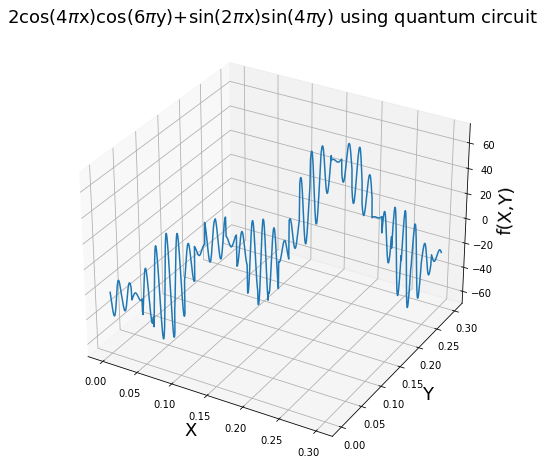

In [112]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')

ax.plot3D(x,y,fx)

#ax.plot3D(x,y,f(x,y))

ax.set_xlabel("X", fontsize=18)

ax.set_ylabel("Y", fontsize=18)

ax.set_zlabel("f(X,Y)", fontsize=18)

ax.set_title("2cos(4$\pi$x)cos(6$\pi$y)+sin(2$\pi$x)sin(4$\pi$y) using quantum circuit", fontsize=18)

plt.show()

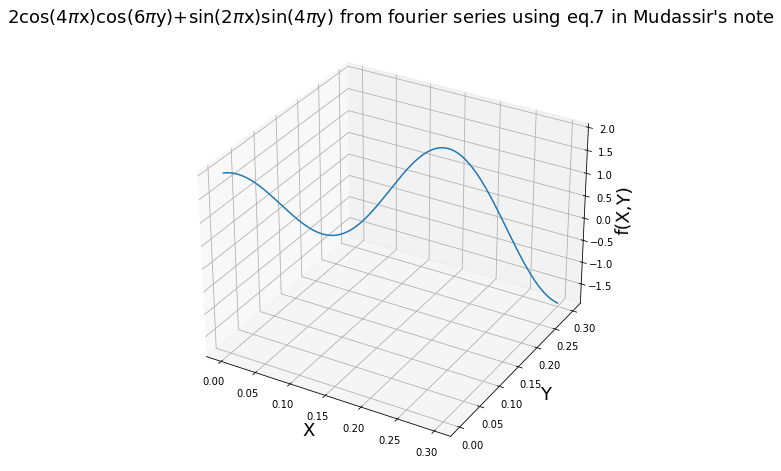

In [46]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')

ax.plot3D(x,y,np.real(F3xy))

#ax.plot3D(x,y,f(x,y))

ax.set_xlabel("X", fontsize=18)

ax.set_ylabel("Y", fontsize=18)

ax.set_zlabel("f(X,Y)", fontsize=18)

ax.set_title("2cos(4$\pi$x)cos(6$\pi$y)+sin(2$\pi$x)sin(4$\pi$y) from fourier series using eq.7 in Mudassir's note", fontsize=18)

plt.show()

In [37]:
circuit.draw()

' 0: ──RZ(-0.393)───RY(1.57)──╭C─────────╭C───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╭C─────────────────────────────────╭C──────────╭SWAP──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╭ControlledPhase

In [68]:
np.exp(-1j*(np.kron(qml.PauliX.matrix,qml.PauliZ.matrix)))

tensor([[1.        -0.j        , 1.        -0.j        ,
         0.54030231-0.84147098j, 1.        -0.j        ],
        [1.        -0.j        , 1.        -0.j        ,
         1.        -0.j        , 0.54030231+0.84147098j],
        [0.54030231-0.84147098j, 1.        -0.j        ,
         1.        -0.j        , 1.        -0.j        ],
        [1.        -0.j        , 0.54030231+0.84147098j,
         1.        -0.j        , 1.        -0.j        ]], requires_grad=True)

In [109]:
a=range(5,10)
for i in range(len(a)):
    print(a[i])

5
6
7
8
9
